In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

In [ ]:
past_data = pd.read_excel("2017_2019.xlsx")
past_data.head(7)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_170a81a445c693e90d79eebfab2bdb8b
0,주제,통검
1,범위,합계
2,기간,일간 : 2017-01-01 ~ 2019-12-31
3,성별,"전체(여성,남성)"
4,연령대,전체
5,날짜,주식
6,2017-01-01,1.36447


In [ ]:
past_data = past_data.drop([0, 1, 2, 3, 4, 5], axis=0)
past_data.columns = ["날짜", "검색량"]
past_data = past_data.reset_index(drop=True)

In [ ]:
past_data

,날짜,검색량
0,2017-01-01,1.36447
1,2017-01-02,8.01662
2,2017-01-03,4.38751
3,2017-01-04,4.51465
4,2017-01-05,4.41345
...,...,...
1090,2019-12-27,5.68112
1091,2019-12-28,2.17622
1092,2019-12-29,2.24307
1093,2019-12-30,6.41432


In [ ]:
past_data["검색량"] = past_data["검색량"].astype("float")

In [ ]:
current_data = pd.read_excel("2020_2022.xlsx")
current_data.head(7)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_22865f59870d4351e01eba3c9044c107
0,주제,통검
1,범위,합계
2,기간,일간 : 2020-01-01 ~ 2022-06-01
3,성별,"전체(여성,남성)"
4,연령대,전체
5,날짜,주식
6,2020-01-01,2.38296


In [ ]:
current_data = current_data.drop([0, 1, 2, 3, 4, 5], axis=0)
current_data.columns = ["날짜", "검색량"]
current_data = current_data.reset_index(drop=True)

In [ ]:
current_data

,날짜,검색량
0,2020-01-01,2.38296
1,2020-01-02,14.64278
2,2020-01-03,6.22716
3,2020-01-04,2.36186
4,2020-01-05,2.35042
...,...,...
878,2022-05-28,3.06728
879,2022-05-29,2.41549
880,2022-05-30,7.87539
881,2022-05-31,8.17429


In [ ]:
current_data["검색량"] = current_data["검색량"].astype("float")

In [ ]:
past_data["Year"] = past_data["날짜"].str[:4]
past_data["month_day"] = past_data["날짜"].str[5:]

In [ ]:
current_data["Year"] = current_data["날짜"].str[:4]
current_data["month_day"] = current_data["날짜"].str[5:]

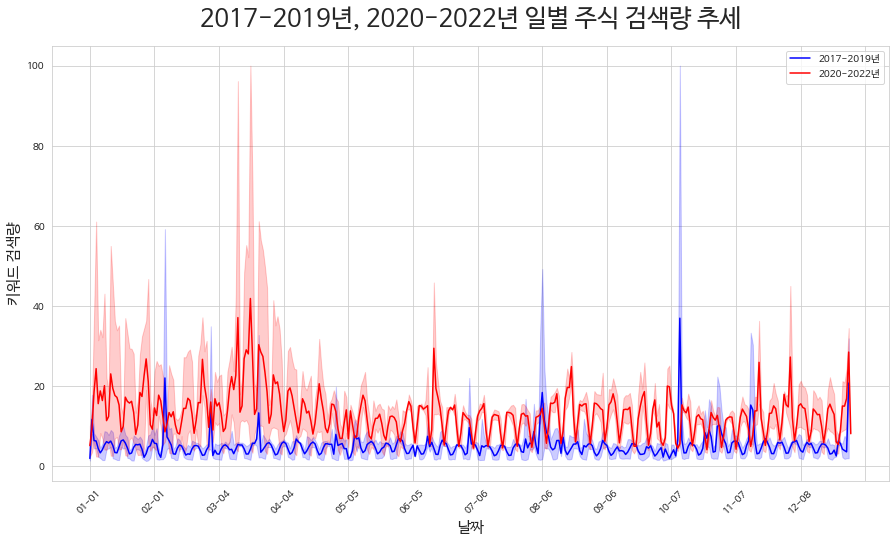

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)

g = sns.lineplot(x="month_day", y="검색량", data=past_data, palette='seismic', color="blue")
k = sns.lineplot(x="month_day", y="검색량", data=current_data, palette='seismic', color="red")
g.xaxis.set_major_locator(ticker.MultipleLocator(31))
k.xaxis.set_major_locator(ticker.MultipleLocator(31))


plt.xlabel("날짜", fontsize=15)
plt.ylabel("키워드 검색량", fontsize=15)

plt.legend(["2017-2019년", "2020-2022년"])

plt.title("2017-2019년, 2020-2022년 일별 주식 검색량 추세", fontsize=25, pad=20)

plt.show()

In [ ]:
past_kospi = pd.read_excel("주식시장_일별__20220617152232.xlsx")
past_kospi

,시점,KOSPI지수 (1980.01.04=100),"거래량(주식시장, 잠정치) (만주)","거래량(만주 : 코스닥시장, 잠정치) (만주)","거래대금(억원 : 코스닥시장, 잠정치) (억원)","외국인 순매수(코스닥시장, 잠정치) (억원)"
0,2017.01.02,2026.16,22741,51216,23313,-340
1,2017.01.03,2043.97,26556,62254,29718,169
2,2017.01.04,2045.64,36859,61747,29565,409
3,2017.01.05,2041.95,52527,81128,29131,307
4,2017.01.06,2049.12,44799,75843,30240,-86
...,...,...,...,...,...,...
728,2019.12.23,2203.71,49436,72586,39687,-626
729,2019.12.24,2190.08,56016,76309,35724,-10
730,2019.12.26,2197.93,56216,92188,43529,2328
731,2019.12.27,2204.21,48280,80771,43126,437


In [ ]:
past_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   시점                          733 non-null    object 
 1   KOSPI지수 (1980.01.04=100)    733 non-null    float64
 2   거래량(주식시장, 잠정치) (만주)         733 non-null    object 
 3   거래량(만주 : 코스닥시장, 잠정치) (만주)   733 non-null    int64  
 4   거래대금(억원 : 코스닥시장, 잠정치) (억원)  733 non-null    int64  
 5   외국인 순매수(코스닥시장, 잠정치) (억원)    733 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 34.5+ KB


In [ ]:
past_kospi = past_kospi[past_kospi["거래량(주식시장, 잠정치) (만주)"] != '-']

In [ ]:
past_kospi["거래량(주식시장, 잠정치) (만주)"] = past_kospi["거래량(주식시장, 잠정치) (만주)"].astype("int")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
past_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 732
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   시점                          732 non-null    object 
 1   KOSPI지수 (1980.01.04=100)    732 non-null    float64
 2   거래량(주식시장, 잠정치) (만주)         732 non-null    int64  
 3   거래량(만주 : 코스닥시장, 잠정치) (만주)   732 non-null    int64  
 4   거래대금(억원 : 코스닥시장, 잠정치) (억원)  732 non-null    int64  
 5   외국인 순매수(코스닥시장, 잠정치) (억원)    732 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.0+ KB


In [ ]:
column = ["시점", "거래량(주식시장, 잠정치) (만주)"]
past_kospi = past_kospi[column]
past_kospi.columns = ["날짜", "거래량"]
past_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 732
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      732 non-null    object
 1   거래량     732 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
current_kospi = pd.read_excel("주식시장_일별__20220617152401.xlsx")

In [ ]:
current_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   시점                          527 non-null    object 
 1   KOSPI지수 (1980.01.04=100)    527 non-null    float64
 2   거래량(주식시장, 잠정치) (만주)         527 non-null    int64  
 3   거래량(만주 : 코스닥시장, 잠정치) (만주)   527 non-null    int64  
 4   거래대금(억원 : 코스닥시장, 잠정치) (억원)  527 non-null    int64  
 5   외국인 순매수(코스닥시장, 잠정치) (억원)    527 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 24.8+ KB


In [ ]:
current_kospi = current_kospi[current_kospi["거래량(주식시장, 잠정치) (만주)"] != '-']

In [ ]:
current_kospi["거래량(주식시장, 잠정치) (만주)"] = current_kospi["거래량(주식시장, 잠정치) (만주)"].astype("int")

In [ ]:
column = ["시점", "거래량(주식시장, 잠정치) (만주)"]
current_kospi = current_kospi[column]
current_kospi.columns = ["날짜", "거래량"]
current_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      527 non-null    object
 1   거래량     527 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
past_kospi["Year"] = past_kospi["날짜"].str[:4]
past_kospi["month_day"] = past_kospi["날짜"].str[5:]

In [ ]:
past_kospi = past_kospi.sort_values("month_day")
past_kospi

,날짜,거래량,Year,month_day
0,2017.01.02,22741,2017,01.02
243,2018.01.02,23026,2018,01.02
487,2019.01.02,32176,2019,01.02
488,2019.01.03,42798,2019,01.03
1,2017.01.03,26556,2017,01.03
...,...,...,...,...
731,2019.12.27,48280,2019,12.27
485,2018.12.27,39009,2018,12.27
242,2017.12.28,19455,2017,12.28
486,2018.12.28,34784,2018,12.28


In [ ]:
current_kospi["Year"] = current_kospi["날짜"].str[:4]
current_kospi["month_day"] = current_kospi["날짜"].str[5:]

In [ ]:
current_kospi = current_kospi.sort_values("month_day")
current_kospi

,날짜,거래량,Year,month_day
0,2020.01.02,48861,2020,01.02
1,2020.01.03,62253,2020,01.03
496,2022.01.03,42903,2022,01.03
497,2022.01.04,61465,2022,01.04
248,2021.01.04,101065,2021,01.04
...,...,...,...,...
245,2020.12.28,97765,2020,12.28
246,2020.12.29,103679,2020,12.29
494,2021.12.29,53660,2021,12.29
247,2020.12.30,106314,2020,12.30


In [ ]:
current_kospi["거래량"].max()

147204857

In [ ]:
current_kospi["거래량"].min()

36776

In [ ]:
current_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 0 to 526
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   날짜         527 non-null    object
 1   거래량        527 non-null    int64 
 2   Year       527 non-null    object
 3   month_day  527 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


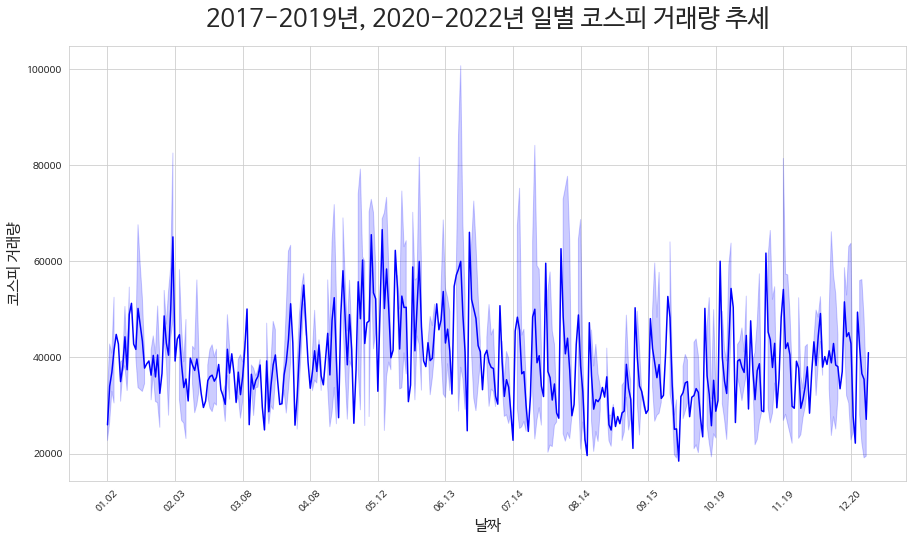

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)

g = sns.lineplot(x="month_day", y="거래량", data=past_kospi, palette='seismic', color="blue")
# k = sns.lineplot(x="month_day", y="거래량", data=current_kospi, palette='seismic', color="red")
g.xaxis.set_major_locator(ticker.MultipleLocator(31))
# k.xaxis.set_major_locator(ticker.MultipleLocator(31))


plt.xlabel("날짜", fontsize=15)
plt.ylabel("코스피 거래량", fontsize=15)

# plt.legend(["2017-2019년", "2020-2022년"])

plt.title("2017-2019년, 2020-2022년 일별 코스피 거래량 추세", fontsize=25, pad=20)

plt.show()